Importing the Dependencies

In [72]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image, display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Reading

In [73]:
# Load the Iris dataset
iris_dataset = load_iris()
print(iris_dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [74]:
# loading the data to a data frame
data_frame = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)

In [75]:
# print the first 5 rows of the dataframe
data_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
# adding the 'target' column to the data frame
data_frame['class'] = iris_dataset.target

In [77]:
# print the first 5 rows of the dataframe
data_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [78]:
# print the last 5 rows of the dataframe
data_frame.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [79]:
# number of rows and columns in the dataset
data_frame.shape

(150, 5)

In [80]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [81]:
# checking for missing values
data_frame.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [82]:
# statistical measures about the data
data_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [83]:
# checking the distribution of Target Varibale
data_frame['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

Text(0.5, 1.0, 'class Distributions \n (0: setosa || 1: versicolor || 2: virginica)')

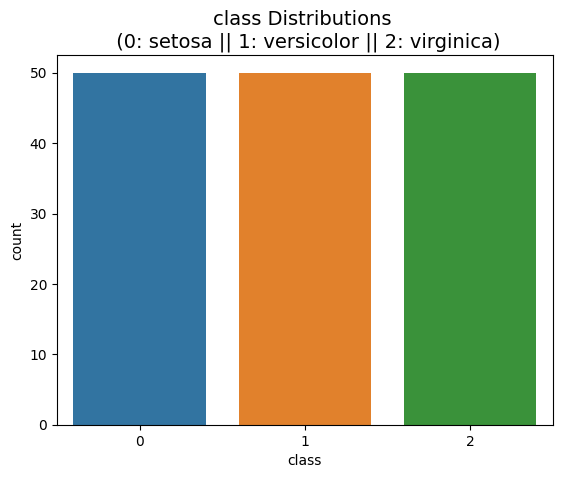

In [84]:
# Plot the class Distribution

colors = ["#0101DF", "#DF0101", "#green"]
sns.countplot(x = data_frame["class"])
plt.title('class Distributions \n (0: setosa || 1: versicolor || 2: virginica)', fontsize=14)

In [85]:
data_frame.groupby('class').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


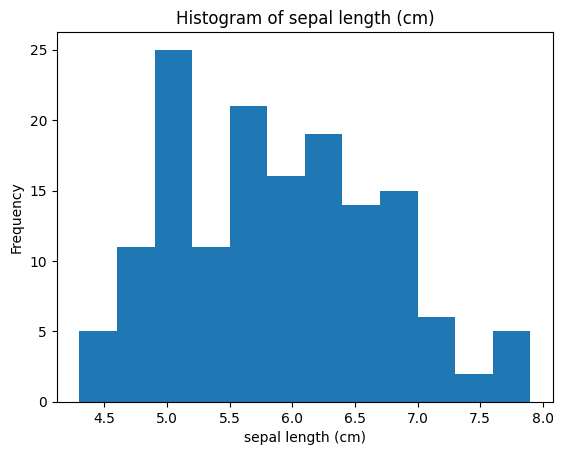

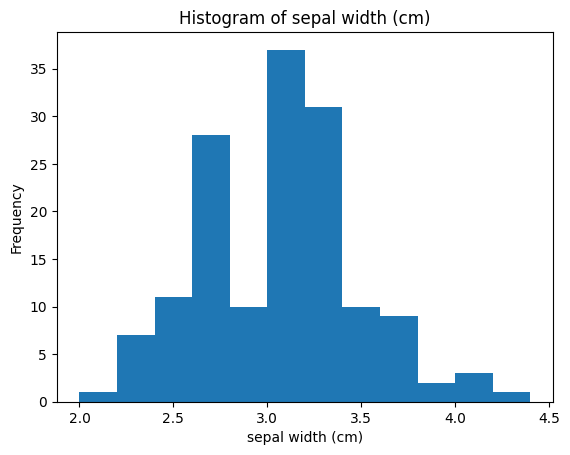

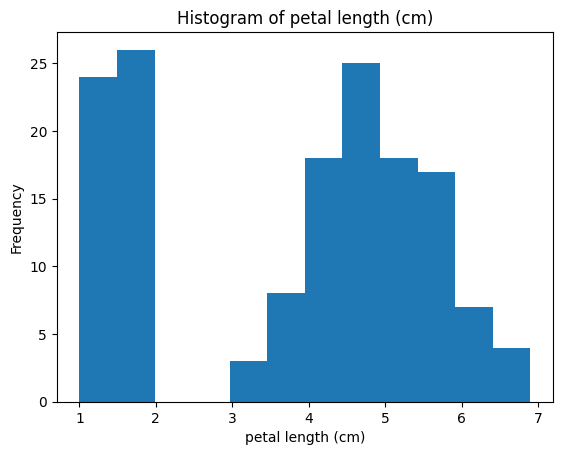

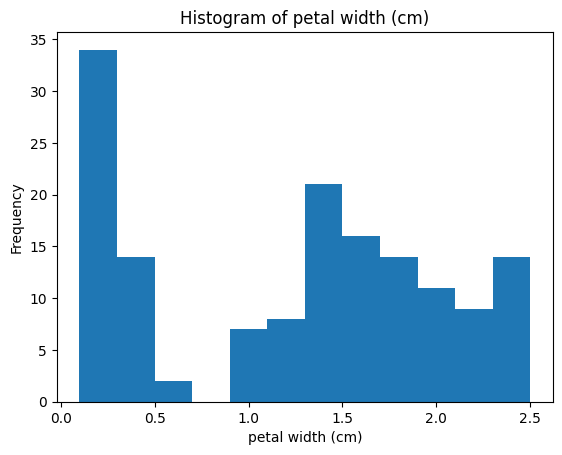

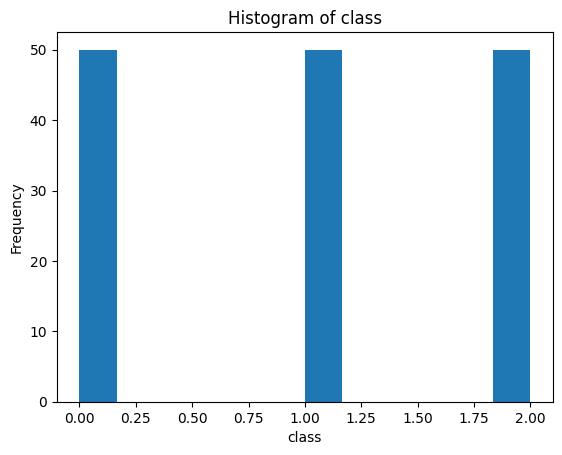

In [86]:
# Loop through each column in the dataframe
for col in data_frame.columns:
    # Calculate the number of bins using the square root rule
    num_bins = int(np.sqrt(len(data_frame[col])))

    # Create a histogram of the column values
    plt.hist(data_frame[col], bins=num_bins)

    # Add labels and title to the plot
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + col)

    # Show the plot
    plt.show()

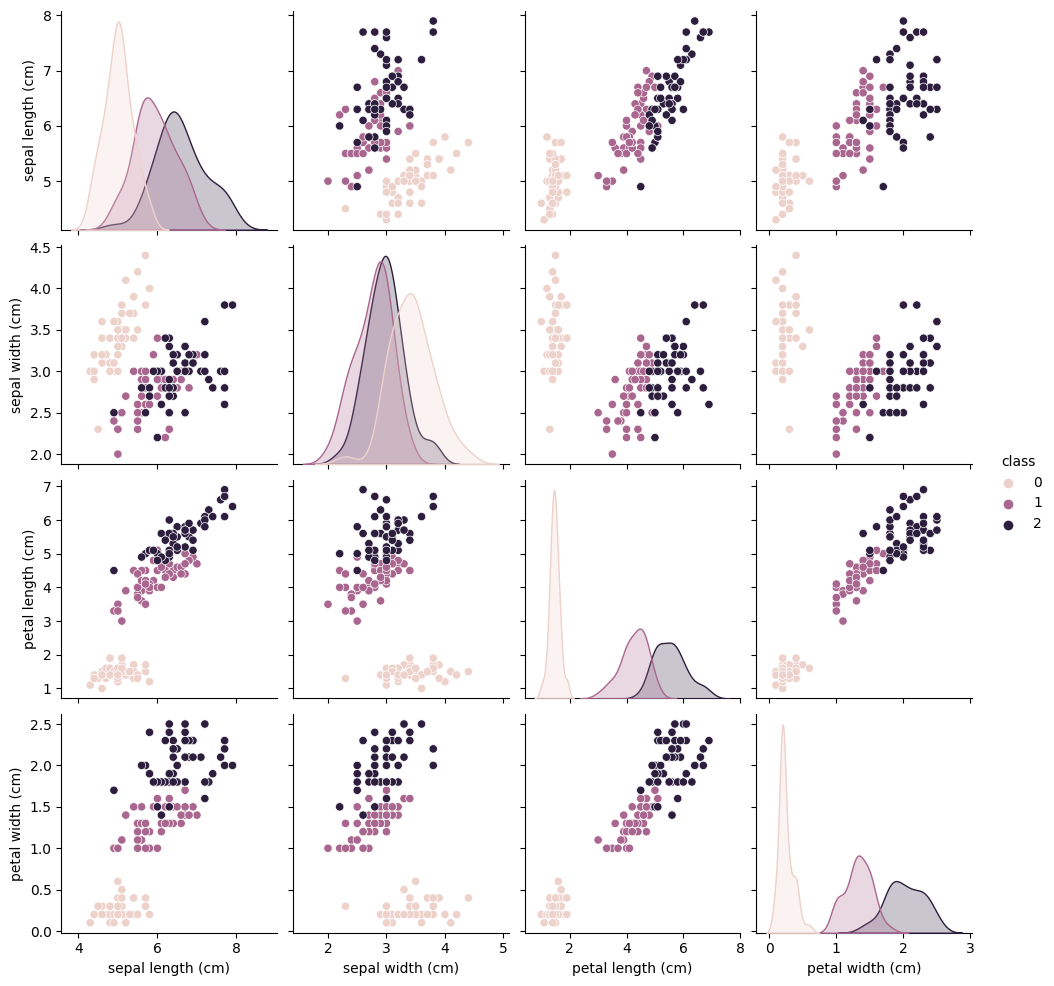

In [87]:
# Visualize data using Seaborn
sns.pairplot(data_frame, hue='class', diag_kind='kde')
plt.show()

Traing & Testing Data Set Split

In [88]:
X = data_frame.drop(columns='class', axis=1)
Y = data_frame['class']

In [89]:
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [90]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64


In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [92]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (127, 4) (23, 4)


Implementing Decision Tree

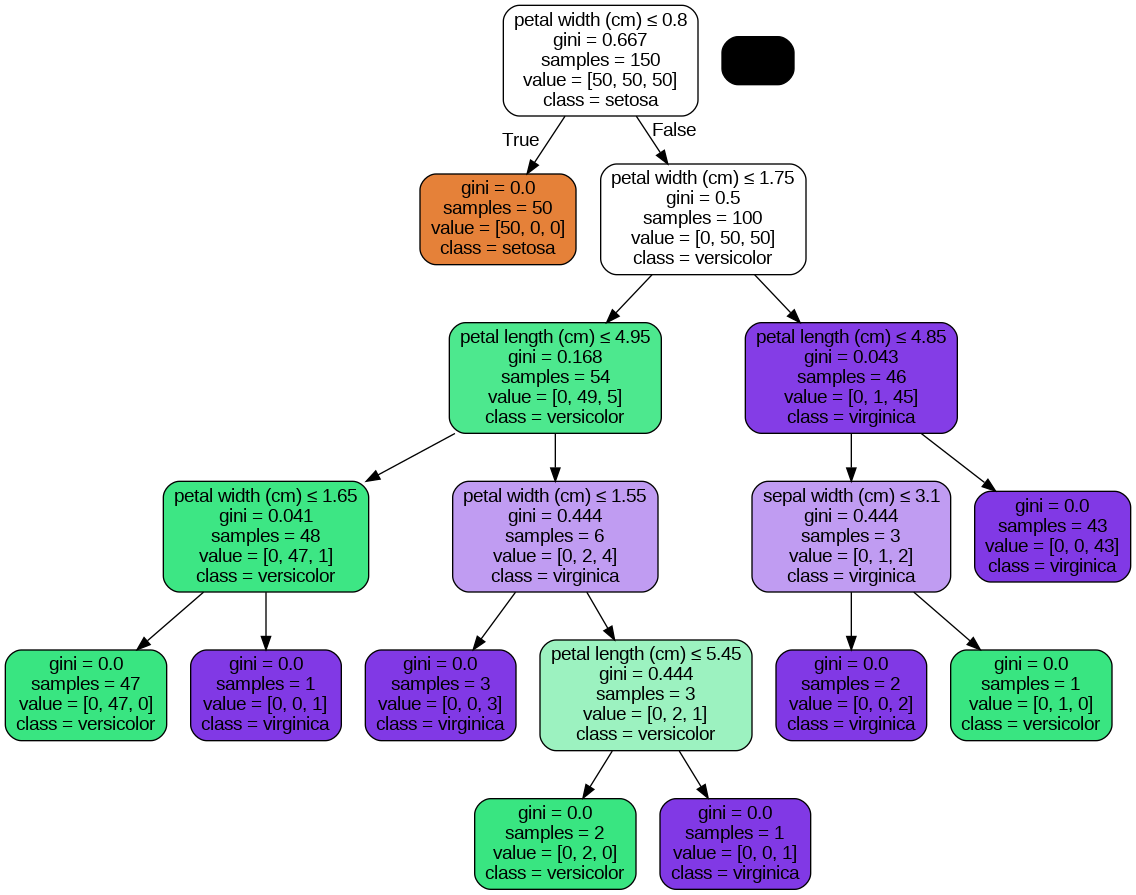

In [93]:
# Create and train the Decision Tree classifier
dtree = DecisionTreeClassifier()
dtree.fit(X, Y)

# Export the decision tree to DOT format
dot_data = export_graphviz(dtree, feature_names=iris_dataset.feature_names,
                           class_names=iris_dataset.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
display(Image(graph.create_png()))

Calculating the Evaluation Score

In [94]:
# Make predictions on the test data
Y_pred = dtree.predict(X_test)  # You need X_test and y_test to calculate accuracy

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy in percentage format
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


Predicting Classes (Testing Case)

In [96]:
# Example new data for prediction
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Replace with your own data

# Make predictions on the new data
predicted_class = dtree.predict(new_data)
predicted_class_name = iris_dataset.target_names[predicted_class][0]

print("Predicted class:", predicted_class_name)


Predicted class: setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [97]:
# Example new data for prediction
new_data = [[7, 3.2, 4.7, 1.4]]  # Replace with your own data

# Make predictions on the new data
predicted_class = dtree.predict(new_data)
predicted_class_name = iris_dataset.target_names[predicted_class][0]

print("Predicted class:", predicted_class_name)


Predicted class: versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [98]:
# Example new data for prediction
new_data = [[6.3, 3.4, 5.6, 2.4]]  # Replace with your own data

# Make predictions on the new data
predicted_class = dtree.predict(new_data)
predicted_class_name = iris_dataset.target_names[predicted_class][0]

print("Predicted class:", predicted_class_name)


Predicted class: virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
